# Computer Science 2XC3 - Graded Lab II

In this day and age, it is very easy to generate automated solutions to any problem, not necessarily becuase of AI, but because of vast online communities that exist to find solution to popular/common problems. Whether or not that solution is correct and applicable to our context,  can be assessed only if we understand the concepts and can critically evaluate them. The goal of this lab is to motivate you to not only produce the correct solution to problems, but also to reflect about why, how and when your solution will likely succeed/fail. 

In this lab you will design experiments with sorting and search algorithms. Please read all instructions carefully. Seek the help of TA's if you need clarifications on the task. Do not hard code any results.

In [134]:
import random
import time
import timeit 
import matplotlib.pyplot as plt
import numpy as np

---
---

### Part A

##### A1. Implement three classes with the following sorting algorithms:
- Bubble Sort
- Insertion Sort
- Selection Sort

In [135]:
class BubbleSort:
    def __init__(self, items_to_sort):
        self.items = items_to_sort
        self.sorted_items = self.items

        for j in range(0,len(self.sorted_items)):
            for i in range(len(self.sorted_items)-1-j):
                if self.sorted_items[i] > self.sorted_items[i+1]:
                    self.sorted_items[i], self.sorted_items[i+1] = self.sorted_items[i+1], self.sorted_items[i]

    def get_sorted(self,):
        return self.sorted_items

In [136]:
class InsertionSort:
    def __init__(self, items_to_sort):
        self.items = items_to_sort
        self.sorted_items = []

        for i in range(1, len(self.items)):
            j = i
            while (j > 0 and self.items[j] < self.items[j-1]):
                self.items[j], self.items[j-1] = self.items[j-1], self.items[j]
                j -= 1
        self.sorted_items = self.items

    def get_sorted(self,):
        return self.sorted_items

In [137]:
class SelectionSort:
    def __init__(self, items_to_sort):
        self.items = items_to_sort
        self.sorted_items=[]

        for i in range(len(self.items)):
            low = i
            for j in range(i, len(self.items)):
                if self.items[j] < self.items[low]:
                    low = j
            self.items[i], self.items[low] = self.items[low], self.items[i]
            self.sorted_items.append(self.items[low])

    def get_sorted(self):
        return self.sorted_items

___

##### A2. Compute the performance of above 3 algorithms on a single list of real numbers.

First generate a custom random list using function <code> create_custom_list()</code>. Execute each of the above algorithm for N trials ( select N >= 75) on the list and plot the timing of each execution on a bar chart. Also calculate the average execution time for the entire batch of N trials ( you can either display it on the chart or simply <code> print()</code> it). For larger values of N, consider breaking N trials into mini batches of n executions and plotting execution times for each mini batch. For instance, if you select N=1000, to plot execution timings for 1000 trials, you may break them into mini batch of n=10 trials and display average of each mini batch. This will reduce clutter in your bar charts while still enabling you to perform extensive testing with higher N.

Execute each of the above algorithm on the same set of integers. The outcome of your code should be 3 charts for each algorithm run on your list N times. Few utility functions are given below. You do not have to necessarily use the <code> draw_plot()</code> function. You can plot your timings using an excel sheet and paste the image of your timings here. Refer to [Markdown Guide](https://www.markdownguide.org/basic-syntax/) on how to add images in the jupyter notebook or ask your TA.

In [138]:
def create_custom_list(length, max_value, item=None, item_index=None):
    random_list = [random.randint(0,max_value) for i in range(length)]
    if item!= None:
        random_list.insert(item_index,item)
    return random_list

def create_near_sorted(sorted_length, unsorted_length, max_value):
    curMax = max_value
    random_list = []
    for i in range(sorted_length+1,1,-1):
        curMax = curMax * (random.random() ** (1/i))
        random_list.append(round(curMax))
    random_list.reverse()
    for _ in range(0,unsorted_length):
        random_list.append(random.randint(0,max_value))
    return random_list

list_100 = create_custom_list(100, 100)
list_1000 = create_custom_list(1000, 1000)
list_10000 = create_custom_list(10000, 10000)
list_100000 = create_custom_list(100000, 100000)

In [139]:
def draw_plot(run_arr, title="Run time for sorting"):
    x = np.arange(0, len(run_arr),1)
    fig=plt.figure(figsize=(20,8))
    plt.bar(x,run_arr)
    plt.axhline(np.mean(run_arr),color="red",linestyle="--",label="Avg")
    plt.xlabel("Iterations")
    plt.ylabel("Run time in ms in order of 1e-6")
    plt.title(title)
    plt.show()

def draw_time_complexity_plot(run_arr, title="Run time for sorting"):
    x = np.arange(0, len(run_arr), 1)
    fig = plt.figure(figsize=(20, 8))
    plt.bar(x, run_arr)
    plt.axhline(np.mean(run_arr), color="red", linestyle="--", label="Avg")
    my_xticks = ['Bubble Sort', 'Insertion Sort', 'Selection Sort']
    plt.xticks(x, my_xticks)
    plt.xlabel("Sorting Algorithm")
    plt.ylabel("Run time in ms in order of 1e-6")
    plt.title(title)
    plt.show()

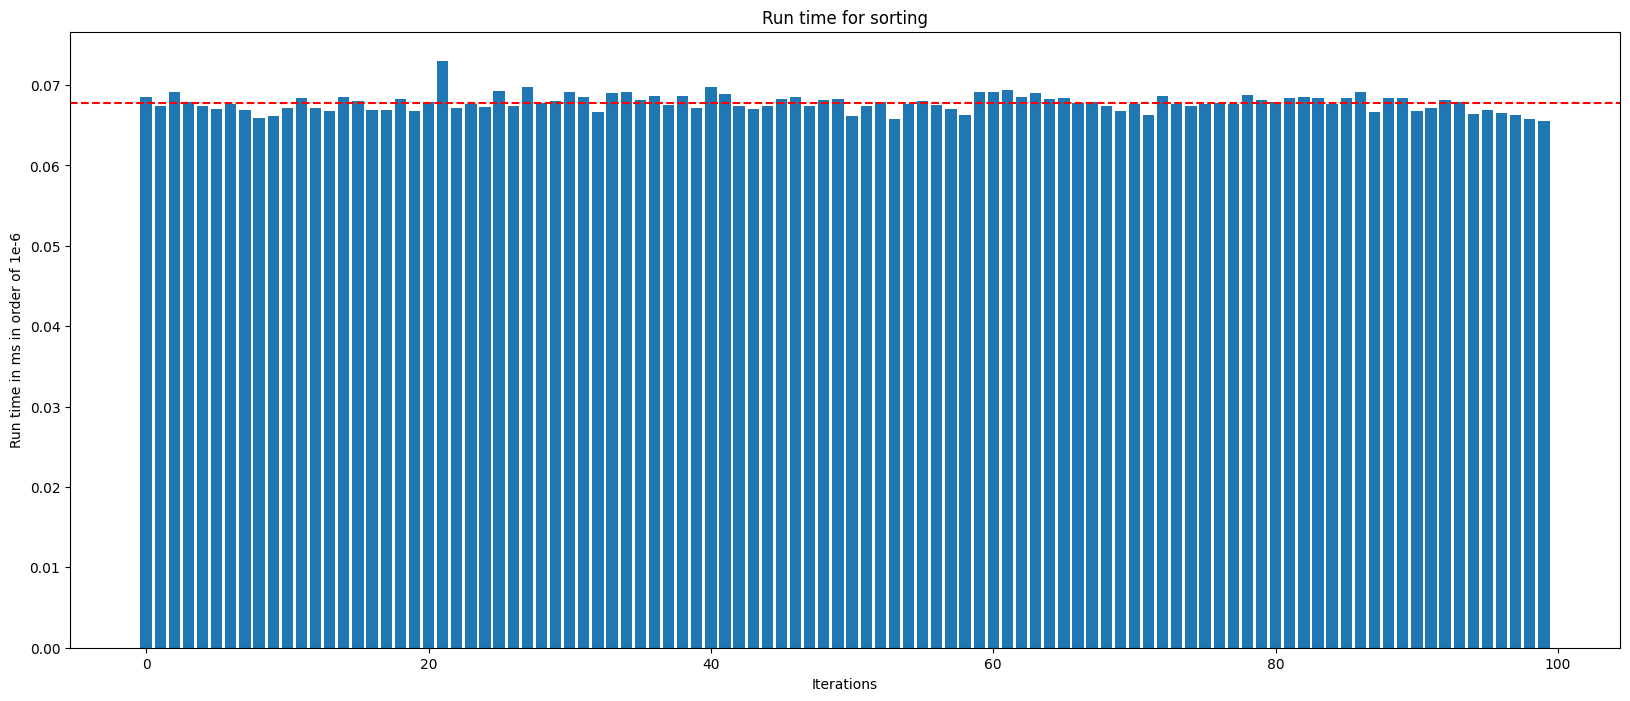

In [140]:
### Bubble sort experiment code goes here
runs = 100
run_times = []

for _ in range(runs):
    list_1000 = create_custom_list(1000, 1000)
    start = timeit.default_timer()
    sortedList = BubbleSort(list_1000)
    stop = timeit.default_timer()
    run_times.append(stop-start)

draw_plot(run_times)

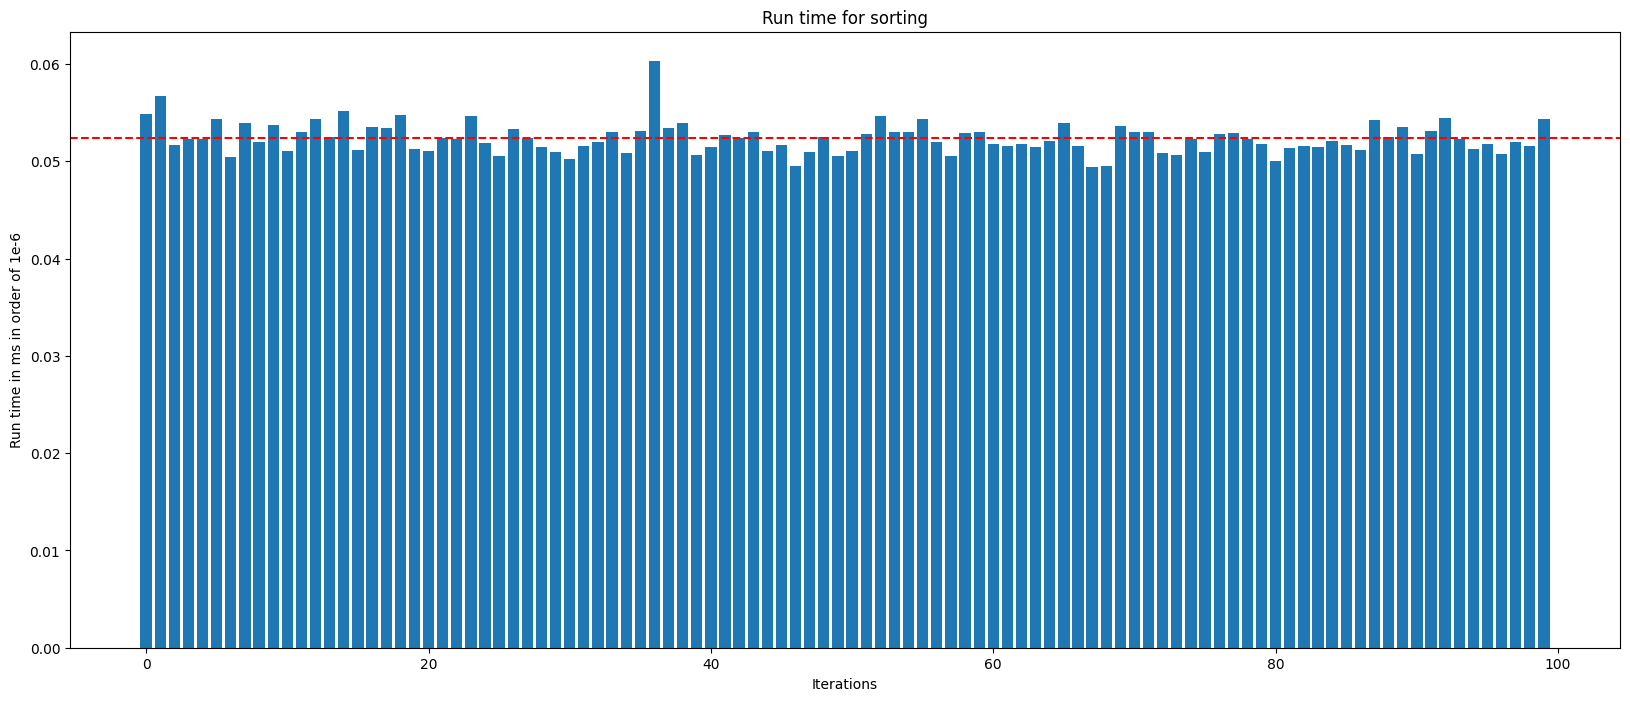

In [141]:
### Insertion sort experiment code goes here
runs = 100
run_times = []

for _ in range(runs):
    list_1000 = create_custom_list(1000, 1000)
    start = timeit.default_timer()
    sortedList = InsertionSort(list_1000)
    stop = timeit.default_timer()
    run_times.append(stop-start)

draw_plot(run_times)

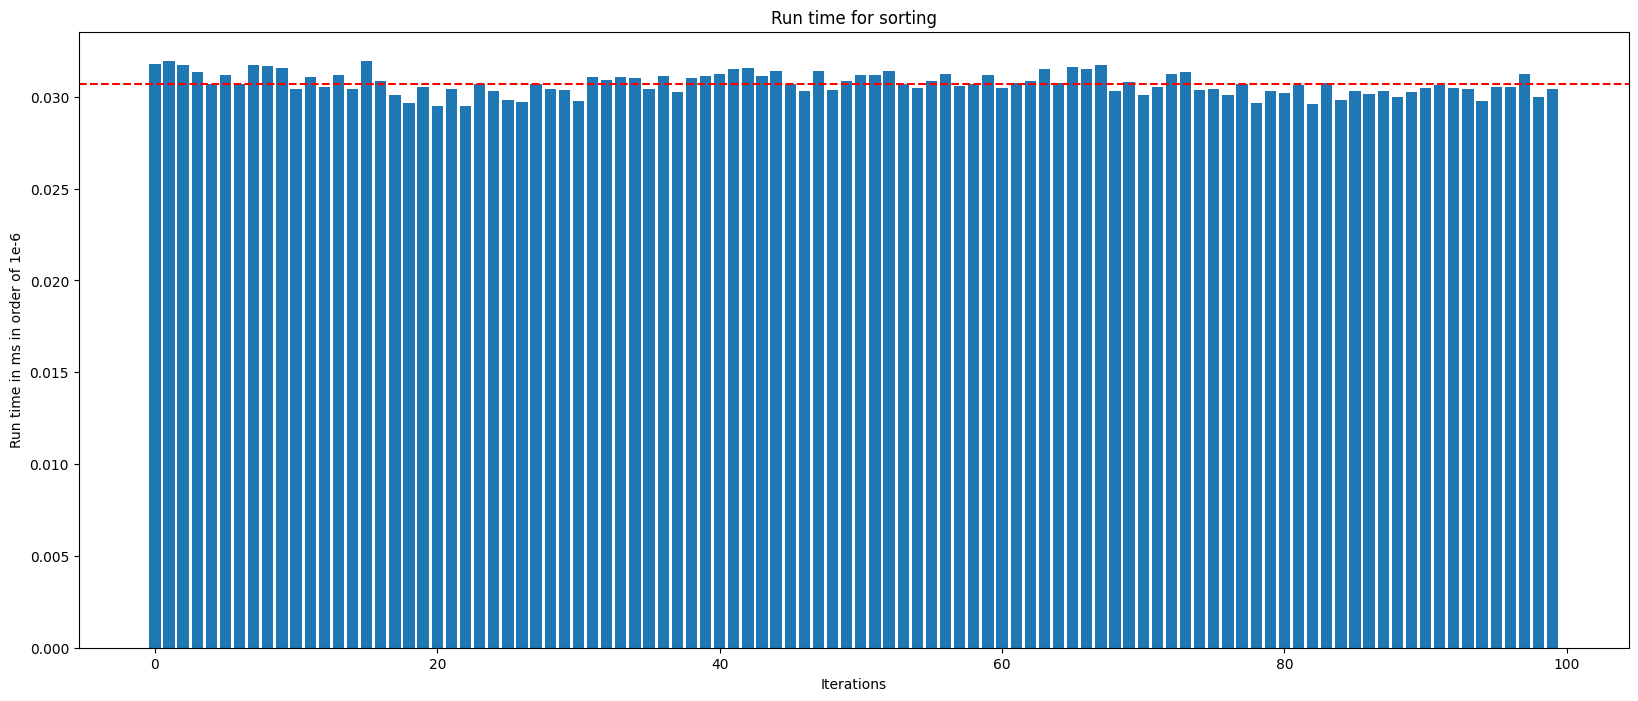

In [142]:
### Selection sort experiment code goes here
runs = 100
run_times = []

for _ in range(runs):
    list_1000 = create_custom_list(1000, 1000)
    start = timeit.default_timer()
    sortedList = SelectionSort(list_1000)
    stop = timeit.default_timer()
    run_times.append(stop-start)

draw_plot(run_times)

**Reflection**:

Selection sort seems to be the fastest sorting algorithm, followed by insertion sort, with bubble sort being the slowest. Bubble sort and insertion sort seem like they would have to perform a similar number of comparisons, but bubble sort is likely slower due to the large number of swaps it has to perform. Selection sort seems to be faster because it will skip more comparisons on average.


---

##### A3. Compute the performance of above 3 algorithms on a different list sizes.

The <code> create_custom_list()</code> helps you create lists of varying lengths and range of numbers. Plot a **line chart** that shows the performance of each algorithm on different list sizes ranging between 1 - 100,000 integers. If you think about this question, you are essentially plotting the time complexity on various list sizes. 

In [143]:
run_times_100 = []
run_times_1000 = []
run_times_10000 = []
run_times_100000 = []

list_100 = create_custom_list(100, 100)
list_1000 = create_custom_list(1000, 1000)
list_10000 = create_custom_list(10000, 10000)

In [144]:
### Bubble sort experiment code goes here
def check_time_bubble(list):
    start = timeit.default_timer()
    BubbleSort(list)
    stop = timeit.default_timer()
    return (stop-start)

run_times_100.append(check_time_bubble(list(list_100)))
run_times_1000.append(check_time_bubble(list(list_1000)))
run_times_10000.append(check_time_bubble(list(list_10000)))

In [145]:
### Insertion sort experiment code goes here
def check_time_insertion(list):
    start = timeit.default_timer()
    InsertionSort(list)
    stop = timeit.default_timer()
    return (stop-start)

run_times_100.append(check_time_insertion(list(list_100)))
run_times_1000.append(check_time_insertion(list(list_1000)))
run_times_10000.append(check_time_insertion(list(list_10000)))


In [146]:
### Selection sort experiment code goes here
def check_time_selection(list):
    start = timeit.default_timer()
    SelectionSort(list)
    stop = timeit.default_timer()
    return (stop-start)

run_times_100.append(check_time_selection(list(list_100)))
run_times_1000.append(check_time_selection(list(list_1000)))
run_times_10000.append(check_time_selection(list(list_10000)))

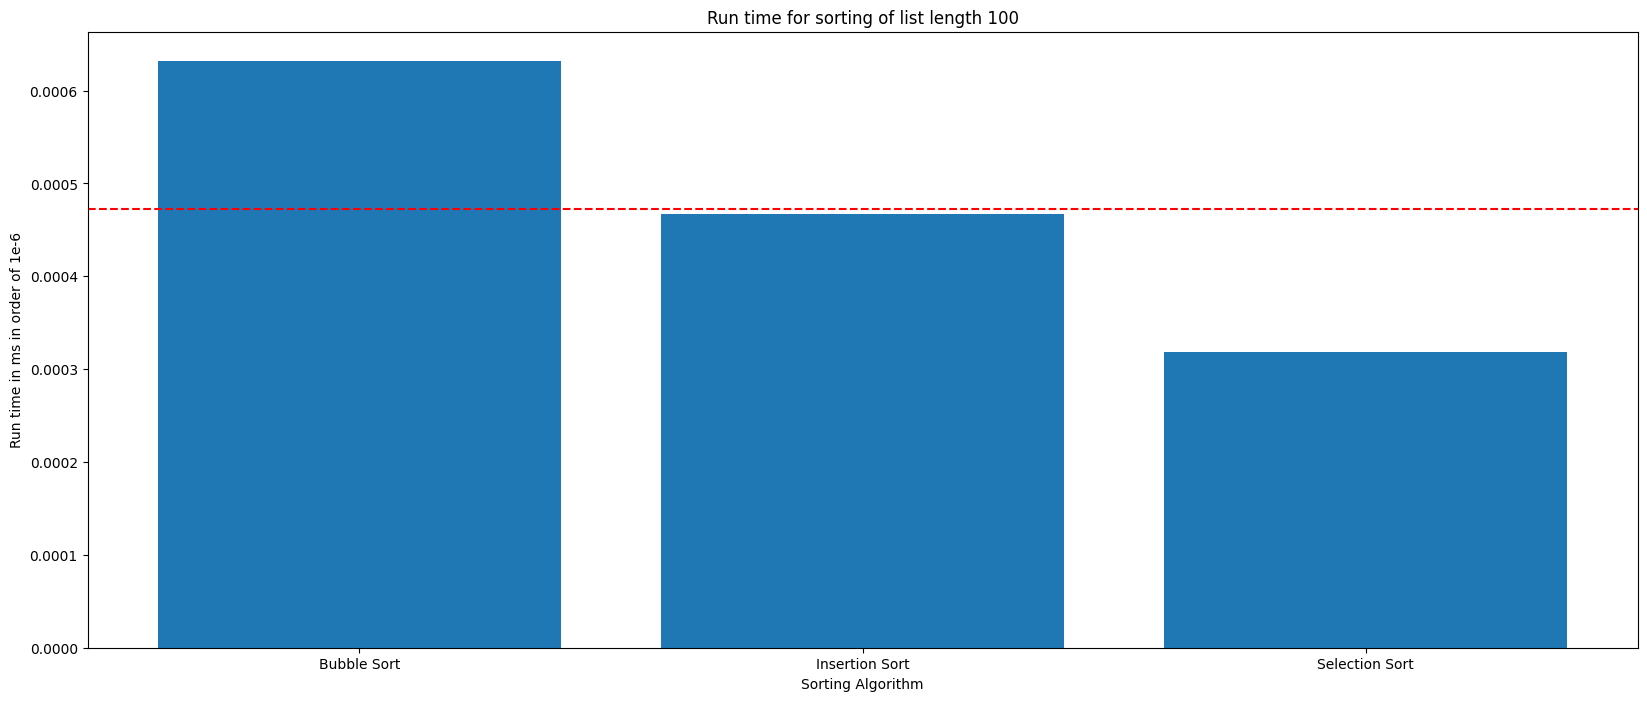

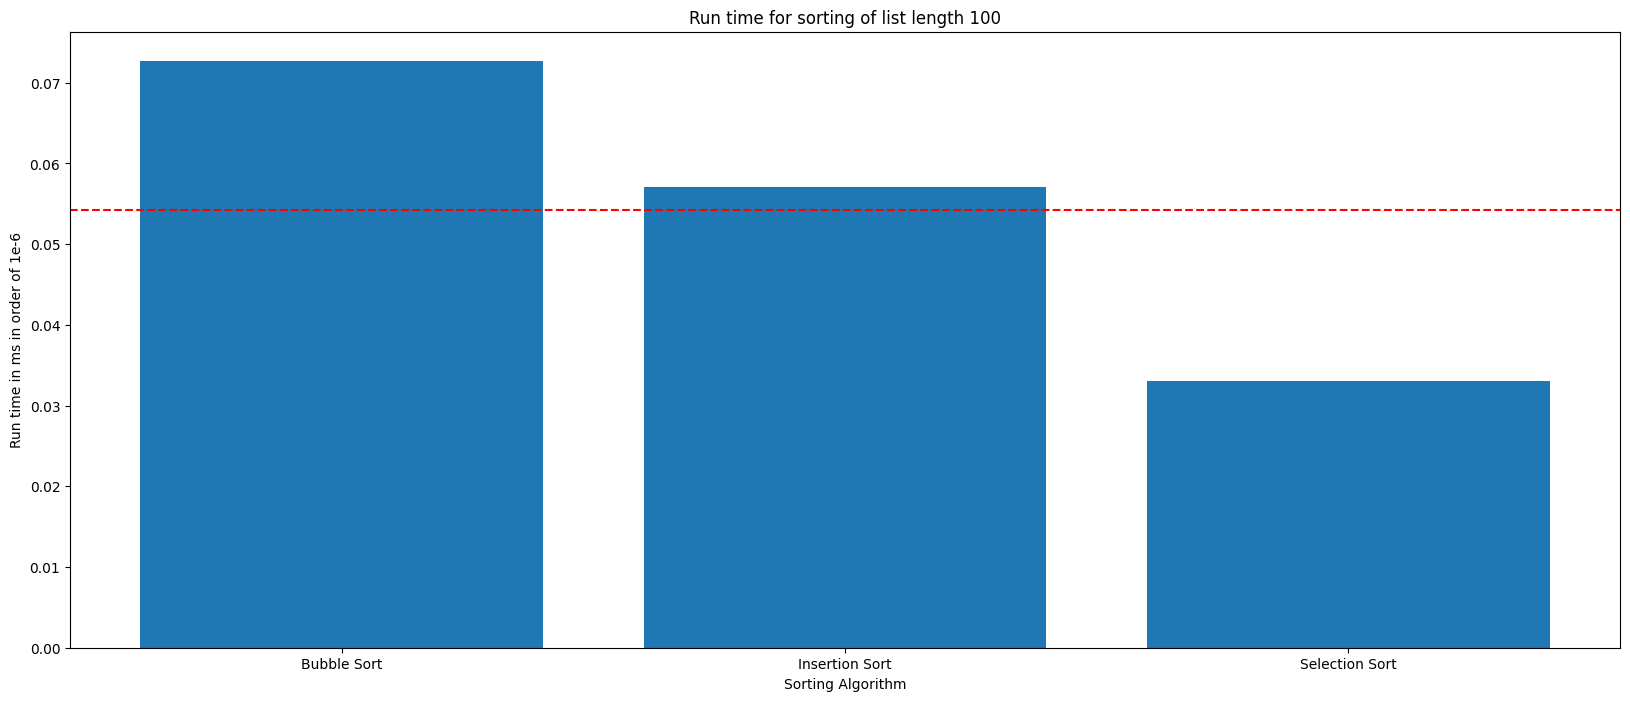

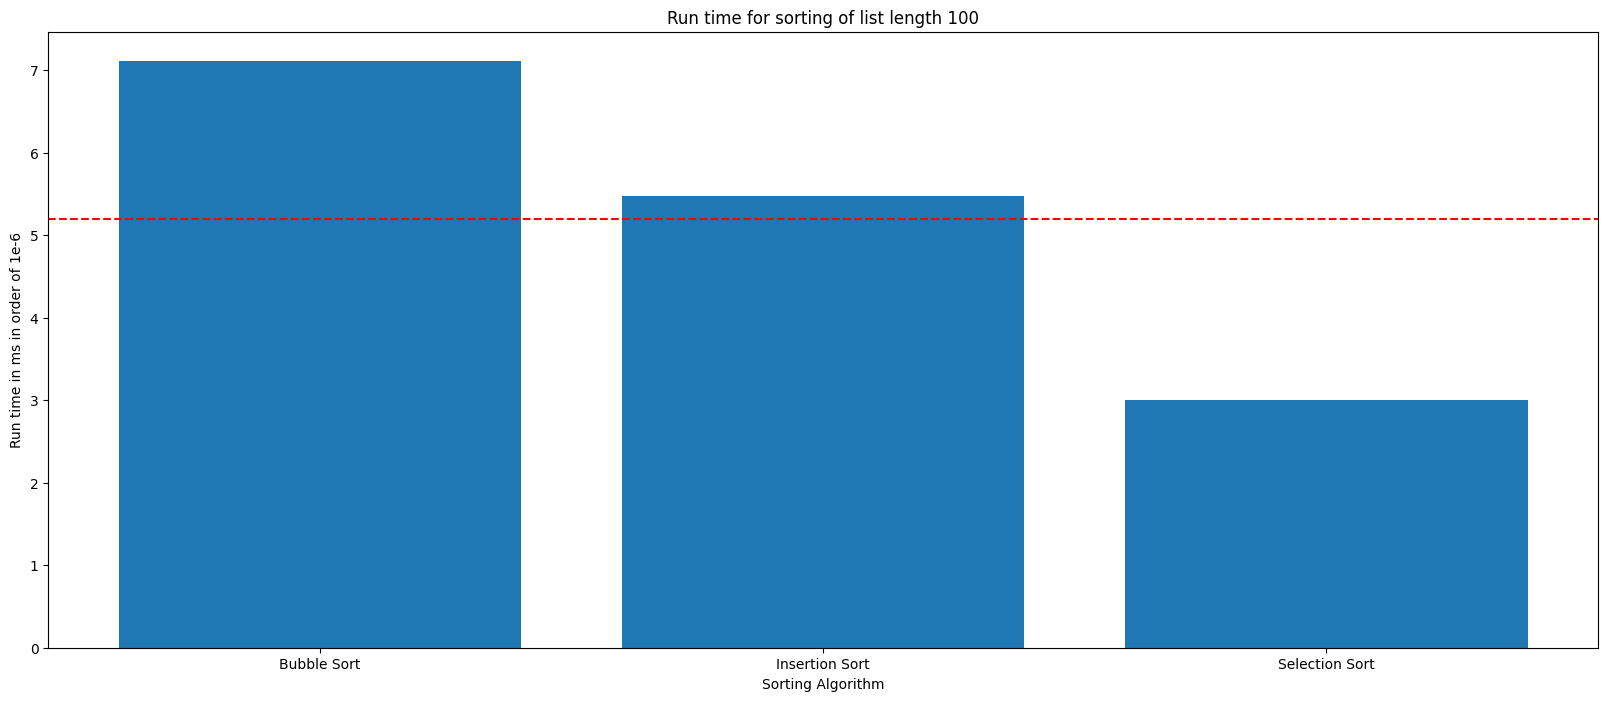

In [147]:
draw_time_complexity_plot(run_times_100, "Run time for sorting of list length 100")
draw_time_complexity_plot(run_times_1000, "Run time for sorting of list length 100")
draw_time_complexity_plot(run_times_10000, "Run time for sorting of list length 100")

**Reflection**:

Not only is selection sort faster for all list sizes, but for larger lists, the difference between selection sort and the other sorting algorithms grows even greater. Additionally, insertion sort continues to be faster than bubble sort, although the difference is not quite as large for the 10,000 size list.


---

##### A4. Compute the performance of above 3 algorithms on a different list "states".

Using the same above list generation function (or writing a function of your own), create two different lists states: 

- A state where the list is **near** sorted.
- A state where the list is completely unsorted.

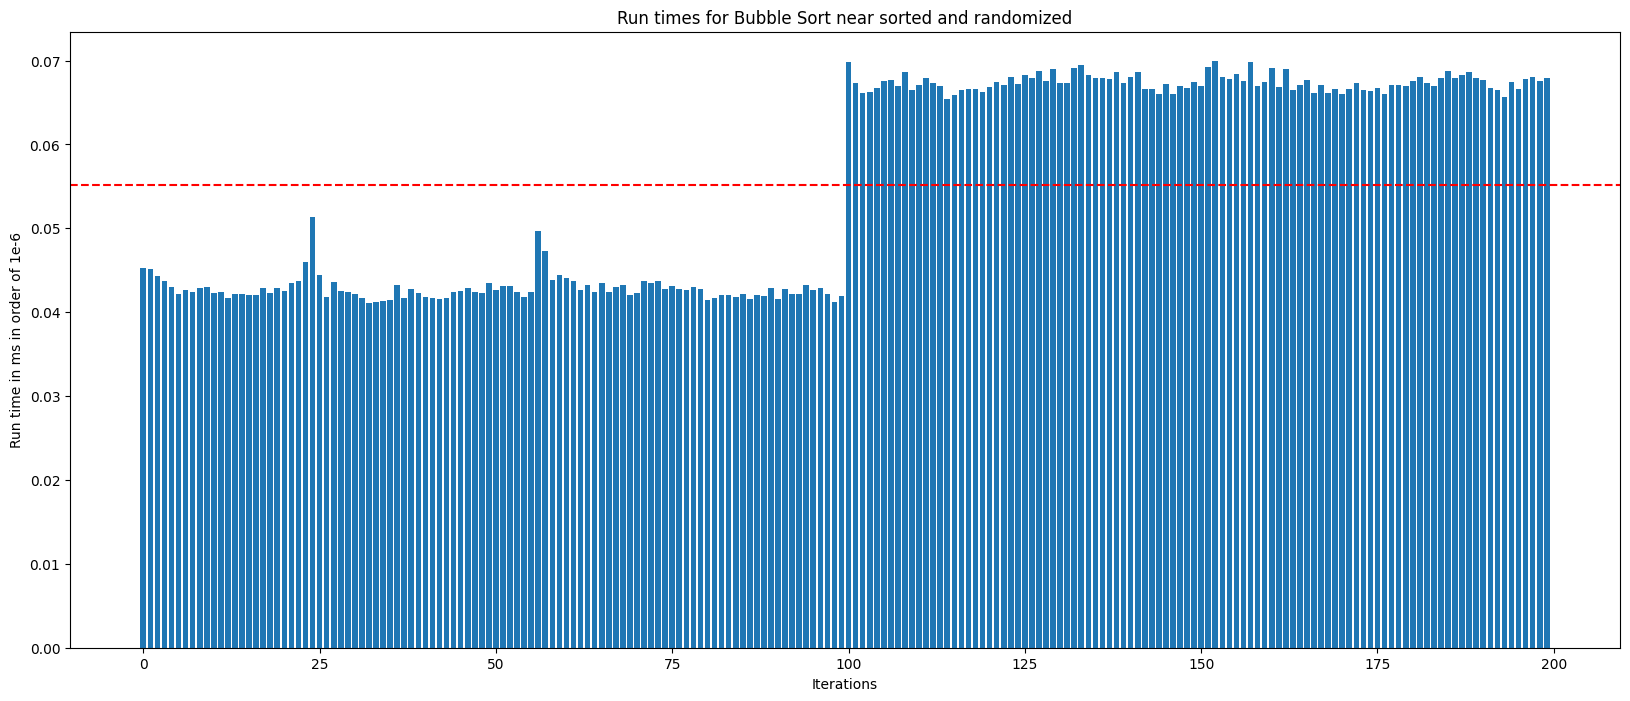

In [148]:
### Bubble sort experiment code goes here
runs = 100
run_times = []

for _ in range(runs):
    nearSorted = create_near_sorted(900,100,10000)
    start = timeit.default_timer()
    sortedList = BubbleSort(nearSorted)
    stop = timeit.default_timer()
    run_times.append(stop-start)

for _ in range(runs):
    unSorted = create_custom_list(1000, 10000)
    start = timeit.default_timer()
    sortedList = BubbleSort(unSorted)
    stop = timeit.default_timer()
    run_times.append(stop-start)

draw_plot(run_times, 'Run times for Bubble Sort near sorted and randomized')

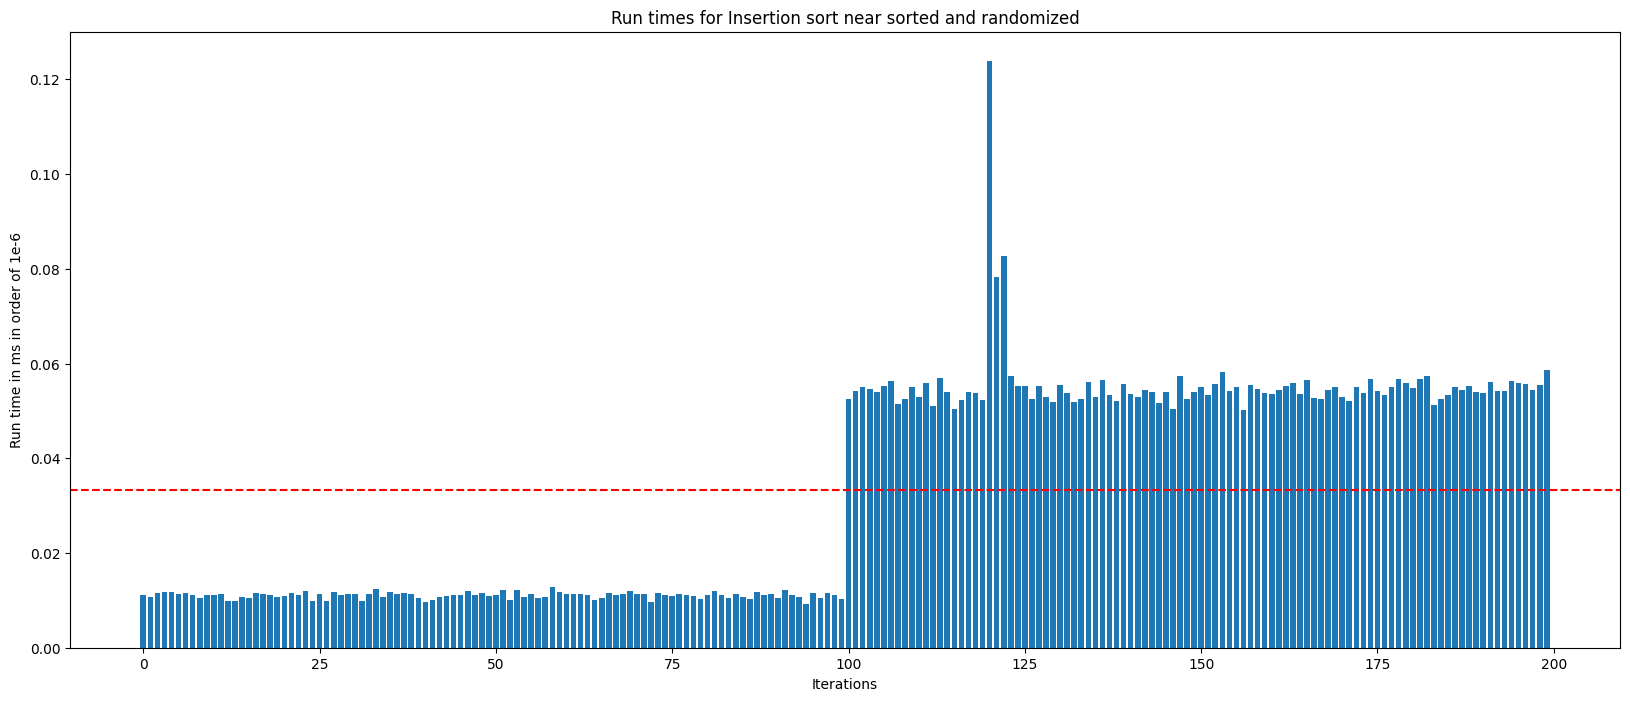

In [149]:
### Insertion sort experiment code goes here
runs = 100
run_times = []

for _ in range(runs):
    nearSorted = create_near_sorted(900,100,10000)
    start = timeit.default_timer()
    sortedList = InsertionSort(nearSorted)
    stop = timeit.default_timer()
    run_times.append(stop-start)

for _ in range(runs):
    unSorted = create_custom_list(1000, 10000)
    start = timeit.default_timer()
    sortedList = InsertionSort(unSorted)
    stop = timeit.default_timer()
    run_times.append(stop-start)

draw_plot(run_times, 'Run times for Insertion sort near sorted and randomized')

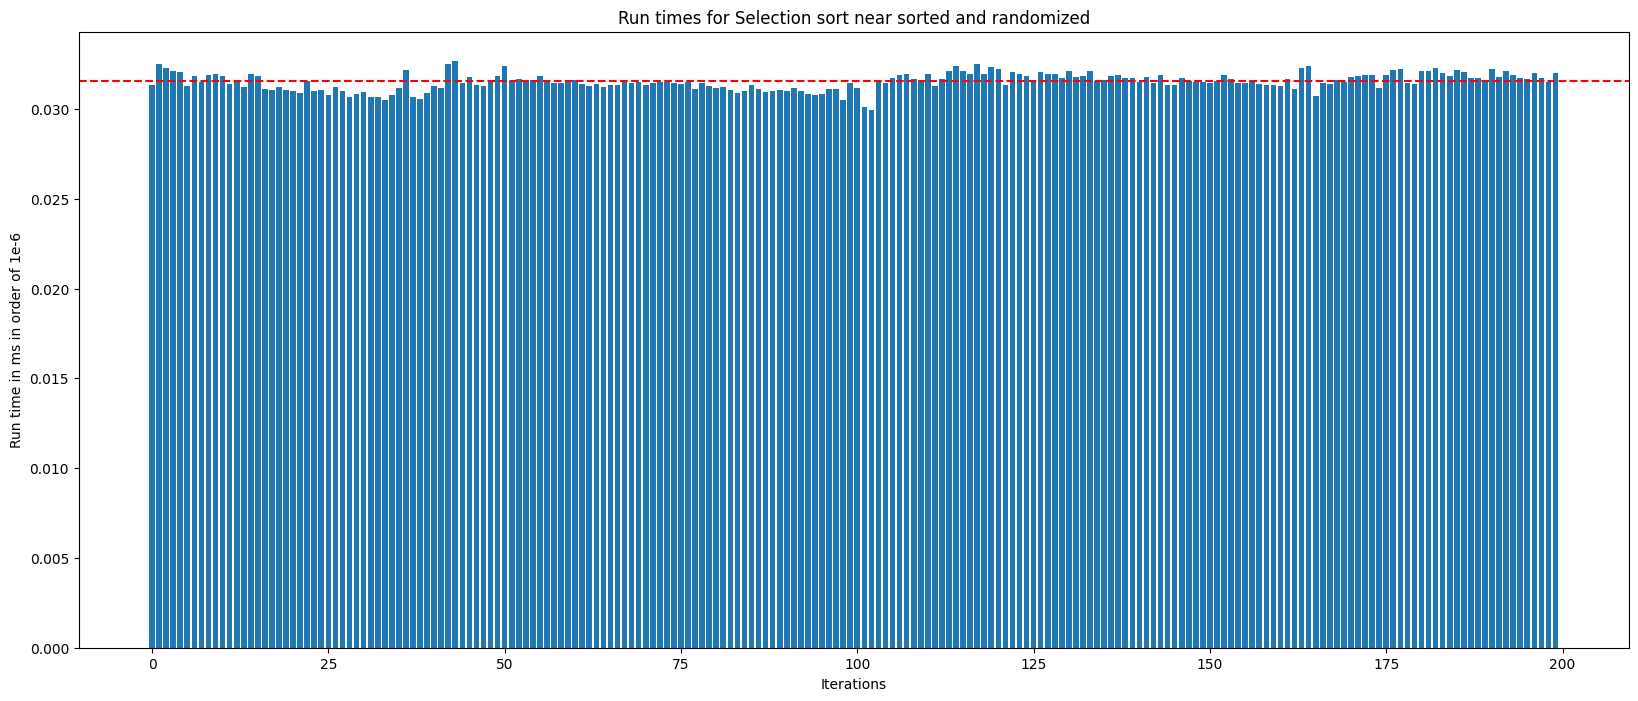

In [150]:
### Selection sort experiment code goes here
runs = 100
run_times = []

for _ in range(runs):
    nearSorted = create_near_sorted(900,100,10000)
    start = timeit.default_timer()
    sortedList = SelectionSort(nearSorted)
    stop = timeit.default_timer()
    run_times.append(stop-start)

for _ in range(runs):
    unSorted = create_custom_list(1000, 10000)
    start = timeit.default_timer()
    sortedList = SelectionSort(unSorted)
    stop = timeit.default_timer()
    run_times.append(stop-start)

draw_plot(run_times, 'Run times for Selection sort near sorted and randomized')

**Reflection**:

Selection sort is the only one to have the same run times for both scenarios. This is to be expected because selection sort run times are both N^2, and the number of comparisons will not change. The best run times for insertion sort and bubble sort are faster as expected. Bubble sort will have less swaps to made in a near-sorted list. Insertion sort will also have less swaps, and less comparisons as each iteration will end faster. This is also why the relative speed of insertion is even faster than bubble sort's relative speed.

---
---

### Part B

In the class, we discussed three implementations of Binary Search. 

In [151]:
def binary_search_1(item_list, to_find):
    lower=0
    upper=len(item_list)-1
    while lower < upper:
        mid = (lower+upper)//2
        if item_list[mid] == to_find:
            return True
        if item_list[mid] < to_find:
            lower = mid+1
        else:
            upper=mid
    return item_list[lower]==to_find

In [152]:
def binary_search_2(item_list, to_find):
    lower=0
    upper=len(item_list)-1
    while lower <= upper:
        mid = (lower+upper)//2
        if item_list[mid] == to_find:
            return True
        if item_list[mid] < to_find:
            lower = mid+1
        else:
            upper=mid-1
    return item_list[lower]==to_find

In [153]:
def binary_search_3(item_list, to_find):
    left=0
    right=len(item_list)-1
    while left != right:
        mid = (left+right)//2
        if item_list[mid] < to_find:
            left = mid+1
        elif item_list[mid] > to_find:
            right = mid
        else:
            return True
    return item_list[left]==to_find

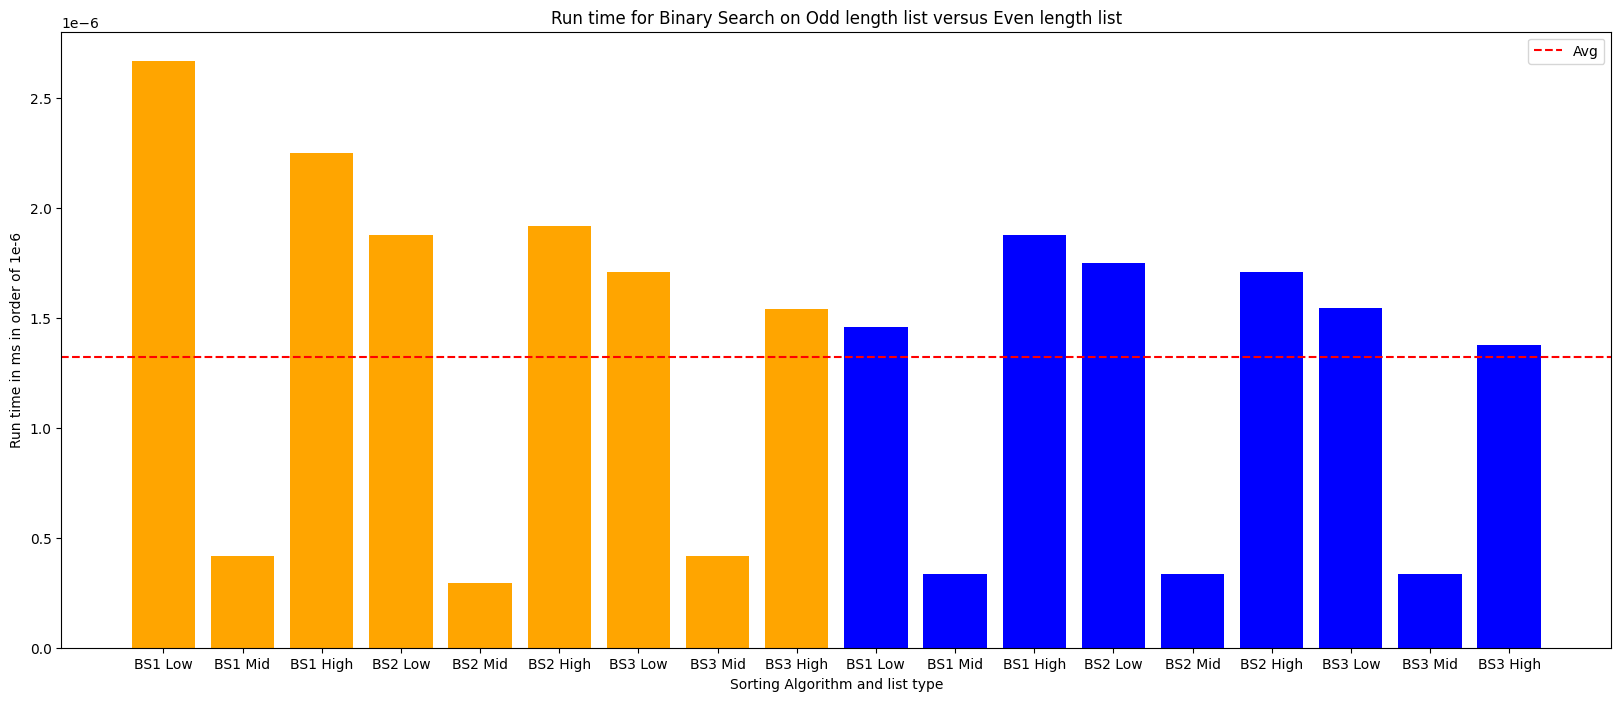

In [154]:
odd_list = [i for i in range(2501)]
even_list = [i for i in range(2500)]

def bs_1_speed(list, num):
    start = timeit.default_timer()
    binary_search_1(list, num)
    end = timeit.default_timer()
    return end-start
def bs_2_speed(list, num):
    start = timeit.default_timer()
    binary_search_2(list, num)
    end = timeit.default_timer()
    return end-start
def bs_3_speed(list, num):
    start = timeit.default_timer()
    binary_search_3(list, num)
    end = timeit.default_timer()
    return end-start

odd_speed = []
even_speed = []

odd_speed.append(bs_1_speed(odd_list, 1))
odd_speed.append(bs_1_speed(odd_list, 1250))
odd_speed.append(bs_1_speed(odd_list, 2500))
odd_speed.append(bs_2_speed(odd_list, 1))
odd_speed.append(bs_2_speed(odd_list, 1250))
odd_speed.append(bs_2_speed(odd_list, 2500))
odd_speed.append(bs_3_speed(odd_list, 1))
odd_speed.append(bs_3_speed(odd_list, 1250))
odd_speed.append(bs_3_speed(odd_list, 2500))

even_speed.append(bs_1_speed(even_list, 0))
even_speed.append(bs_1_speed(even_list, 1249))
even_speed.append(bs_1_speed(even_list, 2499))
even_speed.append(bs_2_speed(even_list, 0))
even_speed.append(bs_2_speed(even_list, 1249))
even_speed.append(bs_2_speed(even_list, 2499))
even_speed.append(bs_3_speed(even_list, 0))
even_speed.append(bs_3_speed(even_list, 1249))
even_speed.append(bs_3_speed(even_list, 2499))

def draw_binary_search_speeds(run_arr, x_axis):
    x = np.arange(0, len(run_arr), 1)
    plt.figure(figsize=(20, 8))
    half_len = len(run_arr) // 2
    plt.bar(x[:half_len], run_arr[:half_len], color='orange')
    plt.bar(x[half_len:], run_arr[half_len:], color='blue')
    plt.axhline(np.mean(run_arr), color="red", linestyle="--", label="Avg")
    plt.xticks(x, x_axis)
    plt.xlabel("Sorting Algorithm and list type")
    plt.ylabel("Run time in ms in order of 1e-6")
    plt.title("Run time for Binary Search on Odd length list versus Even length list")
    plt.legend()
    plt.show()

bs_xaxis = ['BS1 Low', 'BS1 Mid', 'BS1 High', 'BS2 Low', 'BS2 Mid', 'BS2 High', 'BS3 Low', 'BS3 Mid', 'BS3 High']
bs_xaxis += ['BS1 Low', 'BS1 Mid', 'BS1 High', 'BS2 Low', 'BS2 Mid', 'BS2 High', 'BS3 Low', 'BS3 Mid', 'BS3 High']
draw_binary_search_speeds(odd_speed + even_speed, bs_xaxis)

**Reflection**:

For both the even and odd lists, all 3 algorithms find a value in the middle of the list incredibly quickly. This is because all 3 algorithms will check if the midpoint is equal to the value to find on the first iteration of the while loop. There seems to be no real coherence to whether finding an item at the beginning or the end of the list is faster. It seems to be easier to find values at the beginning and end of the even list compared to the odd list, likely due to the even list guaranteeing even-sized splits every time. With the odd list, it will split the list unevenly and potentially have to do extra comparisons.


---
---

### Part C

Recall that I discussed in the class, the possibility of "reducing the comparisons" in Binary Search implementation. One solution came up is to remove the comparison with "mid". If you design an experiment to test this, you will soon realize that while this speeds up the execution time by reducing the number of comparisons needed, it fails when the element to be searched is right in the middle.  So are there any ways to improve the speed of Binary Search that is not dependent on data? The answer is recursion! In this section, implement a Binary Search recursively.

In [155]:
def binary_search_4(item_list, to_find, left, right):
    if left == right:
        return item_list[left] == to_find
    mid = (left+right)//2
    if item_list[mid] < to_find:
        return binary_search_4(item_list, to_find, mid+1, right)
    return binary_search_4(item_list, to_find, left, mid)

Run all the experiments in Part B comapring all 4 implementations under all 6 cases. Plot the timings, and describe the results in the below section. Write a short description of your observation; why is recursion better in this case?

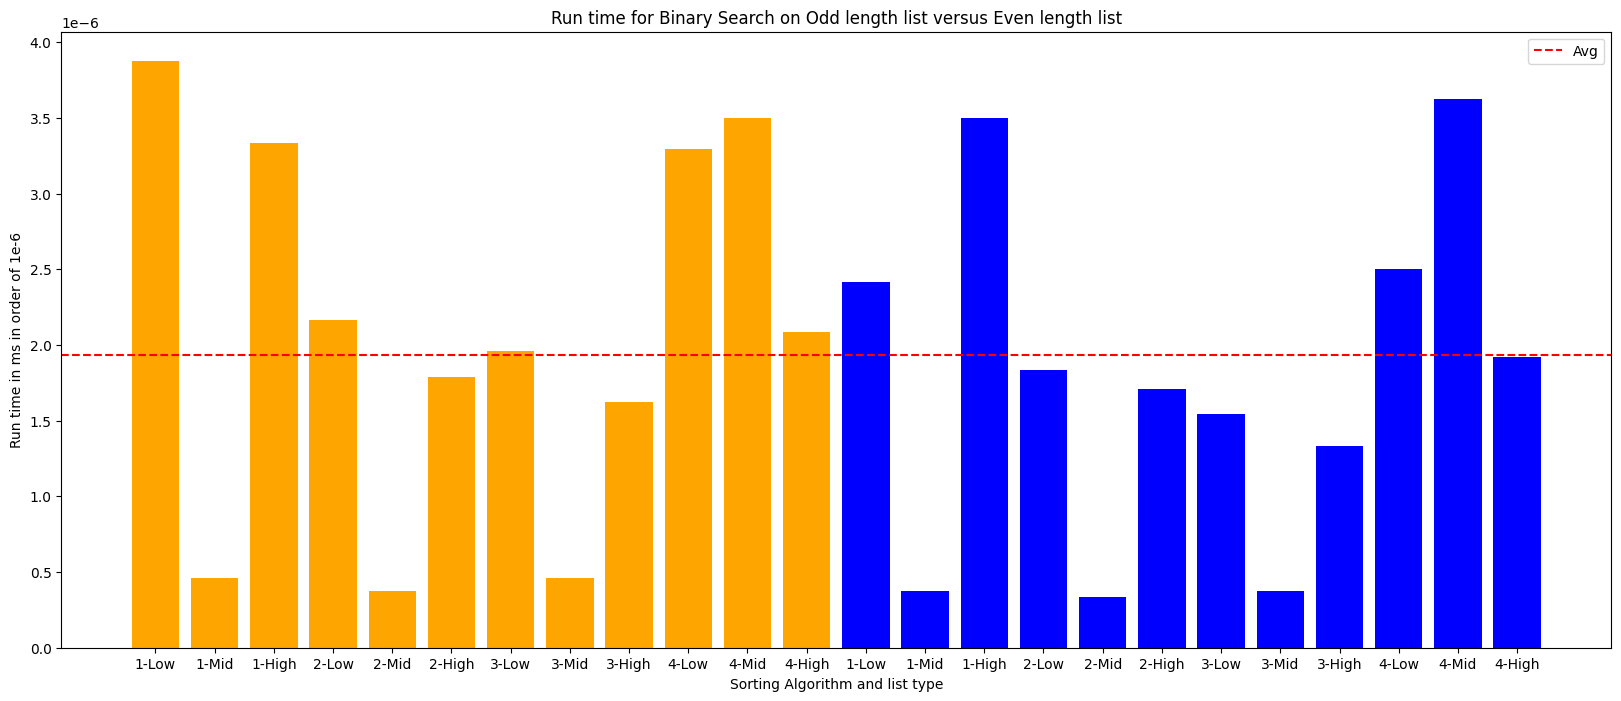

In [156]:
def bs_4_speed(list, num, left, right):
    start = timeit.default_timer()
    binary_search_4(list, num, left, right)
    end = timeit.default_timer()
    return end-start

odd_speed = []
even_speed = []

odd_speed.append(bs_1_speed(odd_list, 1))
odd_speed.append(bs_1_speed(odd_list, 1250))
odd_speed.append(bs_1_speed(odd_list, 2500))
odd_speed.append(bs_2_speed(odd_list, 1))
odd_speed.append(bs_2_speed(odd_list, 1250))
odd_speed.append(bs_2_speed(odd_list, 2500))
odd_speed.append(bs_3_speed(odd_list, 1))
odd_speed.append(bs_3_speed(odd_list, 1250))
odd_speed.append(bs_3_speed(odd_list, 2500))
odd_speed.append(bs_4_speed(odd_list, 1, 0, len(odd_list)-1))
odd_speed.append(bs_4_speed(odd_list, 1250, 0, len(odd_list)-1))
odd_speed.append(bs_4_speed(odd_list, 2500, 0, len(odd_list)-1))

even_speed.append(bs_1_speed(even_list, 0))
even_speed.append(bs_1_speed(even_list, 1249))
even_speed.append(bs_1_speed(even_list, 2499))
even_speed.append(bs_2_speed(even_list, 0))
even_speed.append(bs_2_speed(even_list, 1249))
even_speed.append(bs_2_speed(even_list, 2499))
even_speed.append(bs_3_speed(even_list, 0))
even_speed.append(bs_3_speed(even_list, 1249))
even_speed.append(bs_3_speed(even_list, 2499))
even_speed.append(bs_4_speed(even_list, 0, 0, len(even_list)-1))
even_speed.append(bs_4_speed(even_list, 1249, 0, len(even_list)-1))
even_speed.append(bs_4_speed(even_list, 2499, 0, len(even_list)-1))

def draw_binary_search_speeds(run_arr, x_axis):
    x = np.arange(0, len(run_arr), 1)
    plt.figure(figsize=(20, 8))
    half_len = len(run_arr) // 2
    plt.bar(x[:half_len], run_arr[:half_len], color='orange')
    plt.bar(x[half_len:], run_arr[half_len:], color='blue')
    plt.axhline(np.mean(run_arr), color="red", linestyle="--", label="Avg")
    plt.xticks(x, x_axis)
    plt.xlabel("Sorting Algorithm and list type")
    plt.ylabel("Run time in ms in order of 1e-6")
    plt.title("Run time for Binary Search on Odd length list versus Even length list")
    plt.legend()
    plt.show()

bs_xaxis = []
bs_12_xaxis = ['1-Low', '1-Mid', '1-High', '2-Low', '2-Mid', '2-High', '3-Low', '3-Mid', '3-High']
bs_xaxis += list(bs_12_xaxis)
bs_xaxis += ['4-Low', '4-Mid', '4-High']
bs_xaxis += list(bs_12_xaxis)
bs_xaxis += ['4-Low', '4-Mid', '4-High']

draw_binary_search_speeds(odd_speed + even_speed, bs_xaxis)

##### Result Discussion:

Despite our best attempts to optimize our recursive algorithm it is still quite a bit slower than the interative counterparts! This makes sense; we still have to isolate the number to find each time and call the function again, which would be similar to running another iteration of a while loop. Note that our middle case is also very slow - we've sacrificed this case to make our lower and higher cases faster by not checking the middle item each time.

---
---

### PART D

In [157]:
def qsort(items):
    less = []
    greater = []
    equal = []

    if len(items) > 1:
        pivot = items[0]
        for x in items[1:]:
            if pivot > x:
                less.append(x)
            elif pivot < x:
                greater.append(x)
            else:
                equal.append(x)
        return qsort(less) + equal + qsort(greater)
    return items

# https://stackoverflow.com/questions/18761766/mergesort-with-python
# some idea of a benchmark ^
def merge(items): 
    if len(items) < 2:
        return items
    res = []
    mid = len(items)//2
    left = merge(items[:mid])
    right = merge(items[mid:])

    i, j = 0, 0
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            res.append(left[i])
            i += 1
        else:
            res.append(right[j])
            j += 1

    res += left[i:]
    res += right[j:]
    return res

def hsort(items):
    # heapify
    n = len(items)
    for k in range((n-1)//2,-1,-1):
        while 2*k+1 < n:
            j = 2*k+1
            if j < n-1 and items[j] < items[j+1]:
                j = j + 1
            if items[j] <= items[k]:
                break
            temp = items[k]
            items[k] = items[j]
            items[j] = temp
            k = j

    # heapsort
    while n > 0:
        temp = items[0]
        items[0] = items[n-1]
        items[n-1] = temp
        n=n-1
        k=0
        while 2*k+1 < n:
            j = 2*k+1
            if j < n-1 and items[j] < items[j+1]:
                j = j + 1
            if items[j] <= items[k]:
                break
            temp = items[k]
            items[k] = items[j]
            items[j] = temp
            k = j
    return items

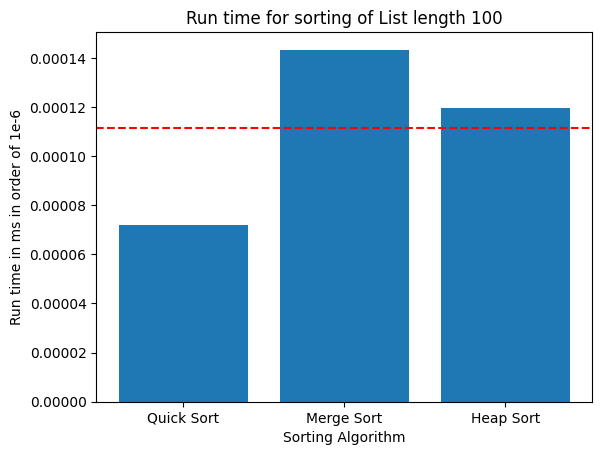

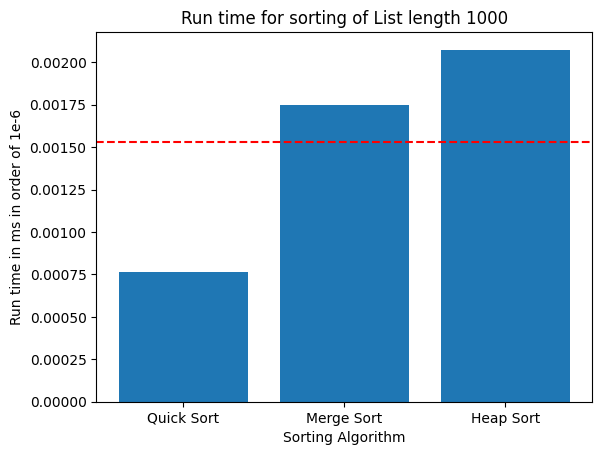

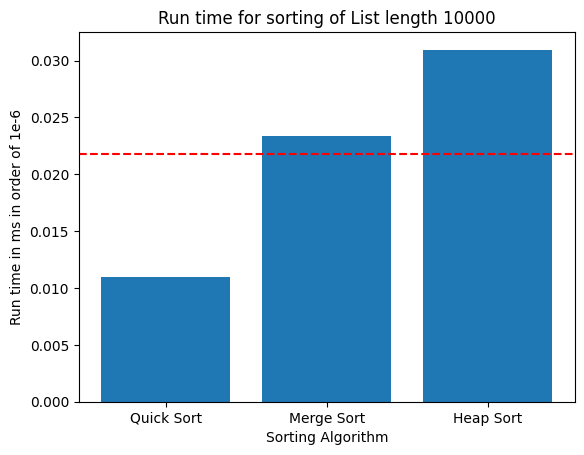

In [158]:
def draw_time_complexity_fast_algo_plot(run_arr, title):
    x = np.arange(0, len(run_arr), 1)
    plt.bar(x, run_arr)
    plt.axhline(np.mean(run_arr), color="red", linestyle="--", label="Avg")
    my_xticks = ['Quick Sort', 'Merge Sort', 'Heap Sort']
    plt.xticks(x, my_xticks)
    plt.xlabel("Sorting Algorithm")
    plt.ylabel("Run time in ms in order of 1e-6")
    plt.title("Run time for sorting of " + title)
    plt.show()

run_times_100 = []
run_times_1000 = []
run_times_10000 = []

static_100 = create_custom_list(100, 100)
static_1000 = create_custom_list(1000, 1000)
static_10000 = create_custom_list(10000, 10000)

def check_time_bubble(list):
    start = timeit.default_timer()
    qsort(list)
    stop = timeit.default_timer()
    return (stop-start)
def check_time_insertion(list):
    start = timeit.default_timer()
    merge(list)
    stop = timeit.default_timer()
    return (stop-start)
def check_time_selection(list):
    start = timeit.default_timer()
    hsort(list)
    stop = timeit.default_timer()
    return (stop-start)

run_times_100.append(check_time_bubble(list(static_100)))
run_times_1000.append(check_time_bubble(list(static_1000)))
run_times_10000.append(check_time_bubble(list(static_10000)))
run_times_100.append(check_time_insertion(list(static_100)))
run_times_1000.append(check_time_insertion(list(static_1000)))
run_times_10000.append(check_time_insertion(list(static_10000)))
run_times_100.append(check_time_selection(list(static_100)))
run_times_1000.append(check_time_selection(list(static_1000)))
run_times_10000.append(check_time_selection(list(static_10000)))

draw_time_complexity_fast_algo_plot(run_times_100, 'List length 100')
draw_time_complexity_fast_algo_plot(run_times_1000, 'List length 1000')
draw_time_complexity_fast_algo_plot(run_times_10000, 'List length 10000')

We used list lengths 100, 1000, and 10000. Each list is randomized. Quick sort is consistently faster, even at small list sizes. Merge sort seems to outperform heapsort at larger list lengths.

---
---

### PART E

E1.

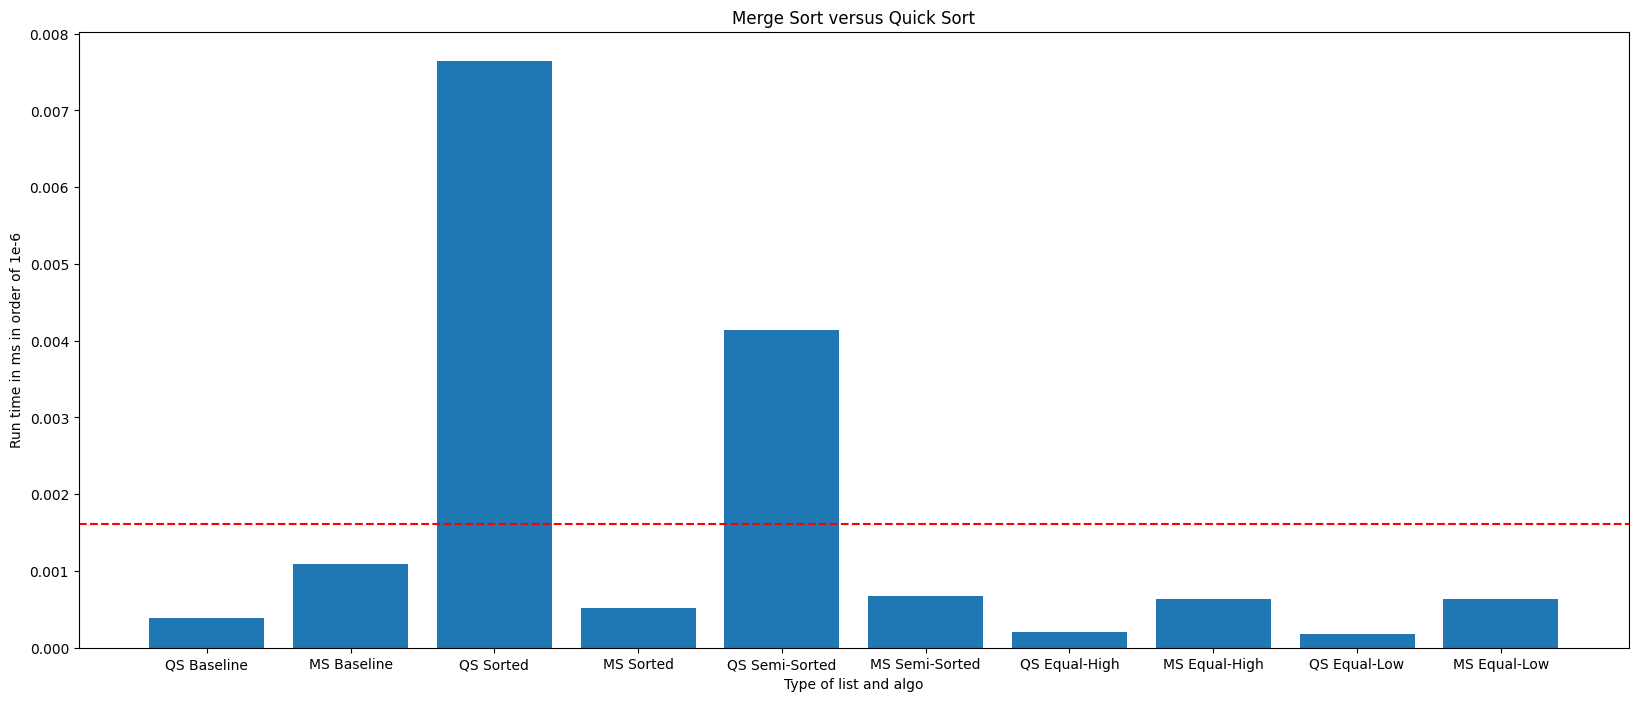

In [159]:
# unsorted lists
qs_unsorted_list_250 = create_custom_list(250, 250)
ms_unsorted_list_250 = list(qs_unsorted_list_250)
qs_unsorted_list_250_2 = create_custom_list(250, 250)
ms_unsorted_list_250_2 = list(qs_unsorted_list_250_2)
qs_unsorted_list_250_3 = create_custom_list(250, 250)
ms_unsorted_list_250_3 = list(qs_unsorted_list_250_3)

# experiment 1
qs_baseline = create_custom_list(500, 500)
ms_baseline = list(qs_baseline)

# experiment 2
sorted_all = [i for i in range(500)]

# experiment 3
qs_semi_sorted = [i for i in range(250)] + qs_unsorted_list_250
ms_semi_sorted = [i for i in range(250)] + ms_unsorted_list_250

# experiment 4
qs_semi_equal_high = [251 for _ in range(250)] + qs_unsorted_list_250_2
ms_semi_equal_high = [251 for _ in range(250)] + ms_unsorted_list_250_2
qs_semi_equal_low = [1 for _ in range(250)] + qs_unsorted_list_250_3
ms_semi_equal_low = [1 for _ in range(250)] + ms_unsorted_list_250_3

def draw_merge_v_qs(run_arr, x_axis):
  x = np.arange(0, len(run_arr), 1)
  plt.figure(figsize=(20, 8))
  plt.bar(x, run_arr)
  plt.axhline(np.mean(run_arr), color="red", linestyle="--", label="Avg")
  plt.xticks(x, x_axis)
  plt.xlabel("Type of list and algo")
  plt.ylabel("Run time in ms in order of 1e-6")
  plt.title("Merge Sort versus Quick Sort")
  plt.show()

def qspeed(list_to_sort):
  start = timeit.default_timer()
  qsort(list_to_sort)
  end = timeit.default_timer()
  return end-start

def mspeed(list_to_sort):
  start = timeit.default_timer()
  merge(list_to_sort)
  end = timeit.default_timer()
  return end-start

graph_list = [
  qspeed(qs_baseline), mspeed(ms_baseline), #1
  qspeed(sorted_all), mspeed(sorted_all), #2
  qspeed(qs_semi_sorted), mspeed(ms_semi_sorted), #3
  qspeed(qs_semi_equal_high), mspeed(ms_semi_equal_high), qspeed(qs_semi_equal_low), mspeed(qs_semi_equal_low), #4
]
draw_merge_v_qs(graph_list, [
  'QS Baseline', 'MS Baseline', #1
  'QS Sorted', 'MS Sorted', #2
  'QS Semi-Sorted', 'MS Semi-Sorted', #3
  'QS Equal-High', 'MS Equal-High',
  'QS Equal-Low', 'MS Equal-Low' #4
])


**Reflection**:

We've opted to include three types of  experiments here: <br><br>
First two cases are baseline. We generate the same random list of 500 and sort it. <br>
The next four cases are on a sorted or semi-sorted list. Sorted is from 1-500. Semi-sorted is from 1-250 and the remaining 250 elements are random. <br>
The final four cases are on a semi-equal list with the first 250 elements being equal. The first two are using 1 as the equal item and the last two are using 251 as the equal item. <br>

Conclusion: <br><br>
Quick Sort is always faster except when the list is sorted or partially sorted. When there are portions of the list that are already sorted merge sort blows it out of the water. On the flipside, if the list has repeated elements quick sort performs even faster than usual!

---

E2. 


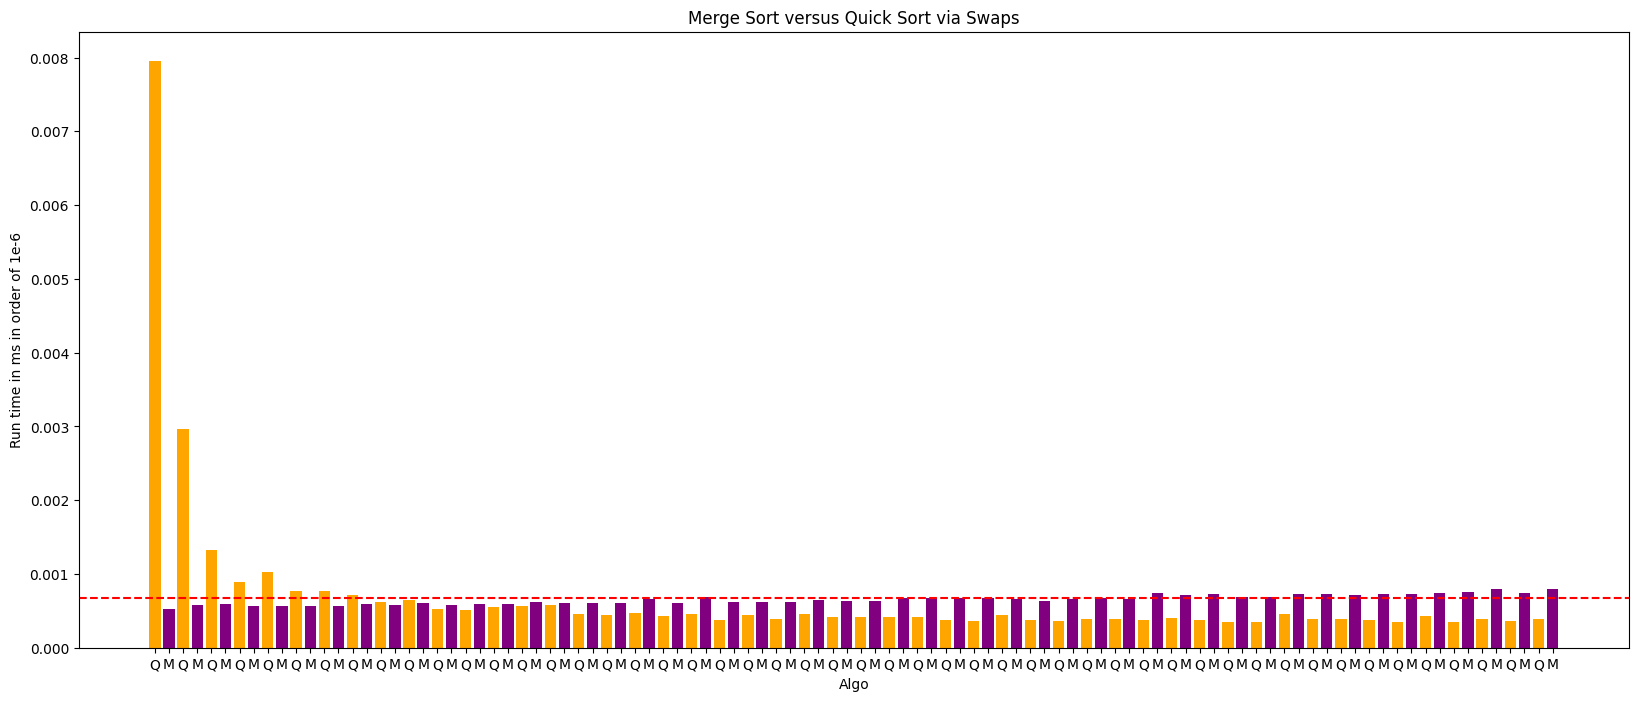

In [160]:
sorted_500 = [i for i in range(500)]

def draw_merge_v_qs_swaps(run_arr, x_axis):
  x = np.arange(0, len(run_arr), 1)
  colors = ['orange', 'purple'] * (len(run_arr)//2) + ['blue']*(len(run_arr)%2)
  plt.figure(figsize=(20, 8))
  plt.bar(x, run_arr, color=colors)
  plt.axhline(np.mean(run_arr), color="red", linestyle="--", label="Avg")
  plt.xticks(x, x_axis)
  plt.title("Merge Sort versus Quick Sort via Swaps")
  plt.ylabel("Run time in ms in order of 1e-6")
  plt.xlabel("Algo")
  plt.show()

def qspeed(list_to_sort):
  start = timeit.default_timer()
  qsort(list_to_sort)
  end = timeit.default_timer()
  return end-start

def mspeed(list_to_sort):
  start = timeit.default_timer()
  merge(list_to_sort)
  end = timeit.default_timer()
  return end-start

graph_list = []
graph_xs = []
for i in range(50):
  qs_sorted_500 = create_custom_list(i*10, 1000) + [j for j in range(i*10, 500)]
  ms_sorted_500 = list(qs_sorted_500)
  graph_list.append(qspeed(qs_sorted_500))
  graph_xs.append('Q')
  graph_list.append(mspeed(ms_sorted_500))
  graph_xs.append('M')

draw_merge_v_qs_swaps(graph_list, graph_xs)

**Reflection**:

So, quicksort will create three portions while sorting. When the pivot position to determine these three positions is poorly chosen, this would result in all or most remaining elements ending up in one of these portions. We can perfectly imitate this poor behaviour of quick sort by setting all elements to equal.<br>

We have 50 cases, all lists of length 500. The first list is completely sorted and equal. Every list after that becomes increasingly unsorted until the end, where nothing is sorted.<br>
Each step we increase the unsorted portion by 10 elements. As you can see it takes about 9-10 iterations, or 20% unsorted, for quicksort to outperform merge sort.

---
---

### PART F

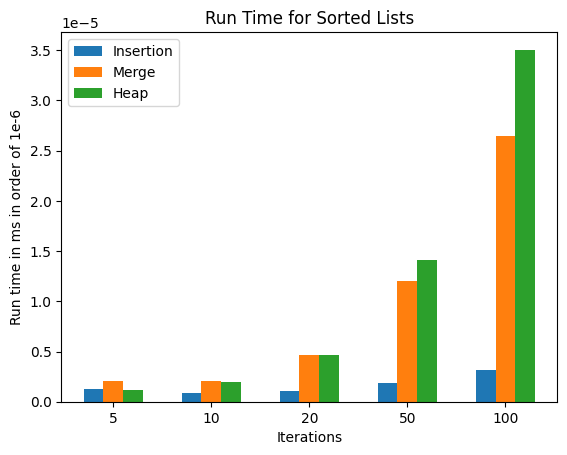

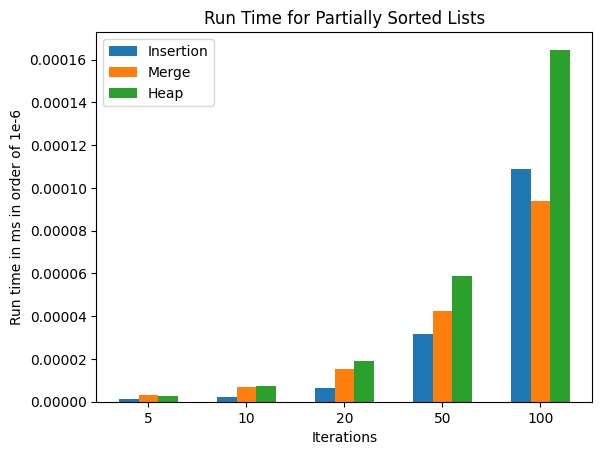

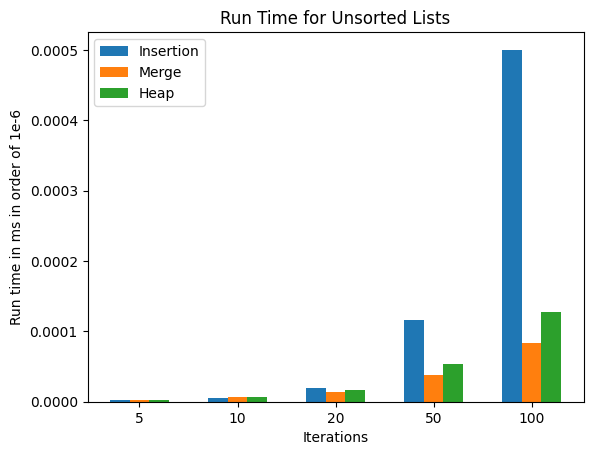

In [161]:
def draw_insertion_test(insert, merge, heap, label):
    x = np.arange(0, len(insert),1)
    plt.bar(x - 0.2, insert, 0.2, label = 'Insertion') 
    plt.bar(x, merge, 0.2, label = 'Merge')
    plt.bar(x + 0.2, heap, 0.2, label = 'Heap')
    plt.xticks(x, sizes)
    plt.xlabel("Iterations")
    plt.ylabel("Run time in ms in order of 1e-6")
    plt.title(label)
    plt.legend()
    plt.show()

sizes = [5,10,20,50,100]
runs = 10
insertion_times = []
merge_times = []
heap_times = []

## tests for sorted lists
for sz in sizes: 
    randomLists = []
    for i in range(runs):
        randomLists.append(qsort(create_custom_list(sz, sz*10)))

    total = 0
    for randomList in randomLists:
        start = timeit.default_timer()
        sortedList = InsertionSort(randomList)
        stop = timeit.default_timer()
        total += stop-start

    insertion_times.append(total/runs)

    total = 0
    for randomList in randomLists:
        start = timeit.default_timer()
        merge(randomList)
        stop = timeit.default_timer()
        total += stop-start

    merge_times.append(total/runs)

    total = 0
    for randomList in randomLists:
        start = timeit.default_timer()
        hsort(randomList)
        stop = timeit.default_timer()
        total += stop-start

    heap_times.append(total/runs)

draw_insertion_test(insertion_times, merge_times, heap_times, "Run Time for Sorted Lists")



insertion_times = []
merge_times = []
heap_times = []

## tests for partially sorted lists
for sz in sizes: 
    randomLists = []
    for i in range(runs):
        randomLists.append(create_near_sorted(sz, round(sz*0.1), sz*10))

    total = 0
    for randomList in randomLists:
        start = timeit.default_timer()
        sortedList = InsertionSort(randomList)
        stop = timeit.default_timer()
        total += stop-start

    insertion_times.append(total/runs)

    total = 0
    for randomList in randomLists:
        start = timeit.default_timer()
        merge(randomList)
        stop = timeit.default_timer()
        total += stop-start

    merge_times.append(total/runs)

    total = 0
    for randomList in randomLists:
        start = timeit.default_timer()
        hsort(randomList)
        stop = timeit.default_timer()
        total += stop-start

    heap_times.append(total/runs)

draw_insertion_test(insertion_times, merge_times, heap_times, "Run Time for Partially Sorted Lists")


insertion_times = []
merge_times = []
heap_times = []

## tests for unsorted lists
for sz in sizes: 
    randomLists = []
    for i in range(runs):
        randomLists.append(create_custom_list(sz, sz*10))

    total = 0
    for randomList in randomLists:
        start = timeit.default_timer()
        sortedList = InsertionSort(randomList)
        stop = timeit.default_timer()
        total += stop-start

    insertion_times.append(total/runs)

    total = 0
    for randomList in randomLists:
        start = timeit.default_timer()
        merge(randomList)
        stop = timeit.default_timer()
        total += stop-start

    merge_times.append(total/runs)

    total = 0
    for randomList in randomLists:
        start = timeit.default_timer()
        hsort(randomList)
        stop = timeit.default_timer()
        total += stop-start

    heap_times.append(total/runs)

draw_insertion_test(insertion_times, merge_times, heap_times, "Run Time for Unsorted Lists")

**Reflection**:

Each bar shows the average run time of 10 runs for the specified algorithm and list state. From these results, we can see that insertion sort is considerably faster than both merge sort and heap sort for small list sizes when the list is sorted. Insertion sort continues to be faster for even 90% sorted lists, but the final graph shows how terrible its runtime can get compared to its nlog(n) counterparts, even for a size as small as 100.

*Hybrid Sort*:

For unsorted lists, insertion sort holds up surprisingly well compared to merge and heapsort at sizes <20. Considering the significant improvement we gain from using insertion sort on sorted lists at that size (seen in the first two graphs), it could be worthwhile to create a hybrid sort function, one that uses insertion sort for lists of size<20, and an nlog(n) sorting algorithm for size>=20.

---
---

**Team Contributions**: In below section describe in detail how you distributed the workload and contributions of each member in the task.

The first ABCD tasks we worked on together in person.<br>
We split the last two parts up: Greg did part E and Jacob did part F (reviewed each as well)


---
---